# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

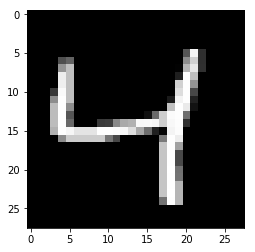

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 10 # feel free to change this value

##W_init = tf.truncated_normal_initializer(stddev=0.1),
##b_init = tf.constant_initializer(value=0.0),

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32,  [None,784])
targets_ = tf.placeholder(tf.float32, [None,784])

# Output of hidden layer, single fully connected layer here with ReLU activation

weights1 = tf.Variable(tf.truncated_normal([784,encoding_dim],stddev=0.1))
bias1 = tf.Variable(tf.zeros([encoding_dim]))
encoded = tf.nn.relu(tf.nn.bias_add(tf.matmul(inputs_,weights1),bias1))

#encoded = tf.layers.dense(inputs_,encoding_dim,activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation

weights2 = tf.Variable(tf.truncated_normal([encoding_dim,784], stddev=0.1))
bias2 = tf.Variable(tf.zeros([784]))
logits = tf.nn.bias_add(tf.matmul(encoded,weights2),bias2)

#logits =  tf.layers.dense(encoded,784)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits)

# Sigmoid cross-entropy loss
loss =  tf.nn.sigmoid_cross_entropy_with_logits(logits=logits,labels=targets_)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer().minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6953
Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6917
Epoch: 1/20... Training loss: 0.6900
Epoch: 1/20... Training loss: 0.6887
Epoch: 1/20... Training loss: 0.6873
Epoch: 1/20... Training loss: 0.6857
Epoch: 1/20... Training loss: 0.6838
Epoch: 1/20... Training loss: 0.6822
Epoch: 1/20... Training loss: 0.6795
Epoch: 1/20... Training loss: 0.6776
Epoch: 1/20... Training loss: 0.6751
Epoch: 1/20... Training loss: 0.6725
Epoch: 1/20... Training loss: 0.6694
Epoch: 1/20... Training loss: 0.6659
Epoch: 1/20... Training loss: 0.6628
Epoch: 1/20... Training loss: 0.6578
Epoch: 1/20... Training loss: 0.6526
Epoch: 1/20... Training loss: 0.6473
Epoch: 1/20... Training loss: 0.6427
Epoch: 1/20... Training loss: 0.6359
Epoch: 1/20... Training loss: 0.6306
Epoch: 1/20... Training loss: 0.6243
Epoch: 1/20... Training loss: 0.6173
Epoch: 1/20... Training loss: 0.6080
Epoch: 1/20... Training loss: 0.5981
Epoch: 1/20... Training loss: 0.5900
E

Epoch: 1/20... Training loss: 0.2369
Epoch: 1/20... Training loss: 0.2403
Epoch: 1/20... Training loss: 0.2400
Epoch: 1/20... Training loss: 0.2423
Epoch: 1/20... Training loss: 0.2362
Epoch: 1/20... Training loss: 0.2330
Epoch: 1/20... Training loss: 0.2348
Epoch: 1/20... Training loss: 0.2404
Epoch: 1/20... Training loss: 0.2361
Epoch: 1/20... Training loss: 0.2423
Epoch: 1/20... Training loss: 0.2466
Epoch: 1/20... Training loss: 0.2330
Epoch: 1/20... Training loss: 0.2348
Epoch: 1/20... Training loss: 0.2417
Epoch: 1/20... Training loss: 0.2334
Epoch: 1/20... Training loss: 0.2294
Epoch: 1/20... Training loss: 0.2335
Epoch: 1/20... Training loss: 0.2315
Epoch: 1/20... Training loss: 0.2327
Epoch: 1/20... Training loss: 0.2307
Epoch: 1/20... Training loss: 0.2359
Epoch: 1/20... Training loss: 0.2317
Epoch: 1/20... Training loss: 0.2340
Epoch: 1/20... Training loss: 0.2388
Epoch: 1/20... Training loss: 0.2345
Epoch: 1/20... Training loss: 0.2356
Epoch: 1/20... Training loss: 0.2355
E

Epoch: 2/20... Training loss: 0.1950
Epoch: 2/20... Training loss: 0.1944
Epoch: 2/20... Training loss: 0.1983
Epoch: 2/20... Training loss: 0.1951
Epoch: 2/20... Training loss: 0.1915
Epoch: 2/20... Training loss: 0.1956
Epoch: 2/20... Training loss: 0.1990
Epoch: 2/20... Training loss: 0.2026
Epoch: 2/20... Training loss: 0.1980
Epoch: 2/20... Training loss: 0.1939
Epoch: 2/20... Training loss: 0.2000
Epoch: 2/20... Training loss: 0.1900
Epoch: 2/20... Training loss: 0.1883
Epoch: 2/20... Training loss: 0.1995
Epoch: 2/20... Training loss: 0.1939
Epoch: 2/20... Training loss: 0.1970
Epoch: 2/20... Training loss: 0.1912
Epoch: 2/20... Training loss: 0.1890
Epoch: 2/20... Training loss: 0.1957
Epoch: 2/20... Training loss: 0.1920
Epoch: 2/20... Training loss: 0.1956
Epoch: 2/20... Training loss: 0.1974
Epoch: 2/20... Training loss: 0.1953
Epoch: 2/20... Training loss: 0.1970
Epoch: 2/20... Training loss: 0.1957
Epoch: 2/20... Training loss: 0.1924
Epoch: 2/20... Training loss: 0.1943
E

Epoch: 3/20... Training loss: 0.1812
Epoch: 3/20... Training loss: 0.1849
Epoch: 3/20... Training loss: 0.1826
Epoch: 3/20... Training loss: 0.1814
Epoch: 3/20... Training loss: 0.1816
Epoch: 3/20... Training loss: 0.1837
Epoch: 3/20... Training loss: 0.1789
Epoch: 3/20... Training loss: 0.1801
Epoch: 3/20... Training loss: 0.1768
Epoch: 3/20... Training loss: 0.1827
Epoch: 3/20... Training loss: 0.1814
Epoch: 3/20... Training loss: 0.1814
Epoch: 3/20... Training loss: 0.1826
Epoch: 3/20... Training loss: 0.1803
Epoch: 3/20... Training loss: 0.1848
Epoch: 3/20... Training loss: 0.1824
Epoch: 3/20... Training loss: 0.1792
Epoch: 3/20... Training loss: 0.1778
Epoch: 3/20... Training loss: 0.1820
Epoch: 3/20... Training loss: 0.1860
Epoch: 3/20... Training loss: 0.1805
Epoch: 3/20... Training loss: 0.1804
Epoch: 3/20... Training loss: 0.1781
Epoch: 3/20... Training loss: 0.1851
Epoch: 3/20... Training loss: 0.1856
Epoch: 3/20... Training loss: 0.1790
Epoch: 3/20... Training loss: 0.1802
E

Epoch: 4/20... Training loss: 0.1738
Epoch: 4/20... Training loss: 0.1786
Epoch: 4/20... Training loss: 0.1738
Epoch: 4/20... Training loss: 0.1784
Epoch: 4/20... Training loss: 0.1738
Epoch: 4/20... Training loss: 0.1657
Epoch: 4/20... Training loss: 0.1782
Epoch: 4/20... Training loss: 0.1706
Epoch: 4/20... Training loss: 0.1673
Epoch: 4/20... Training loss: 0.1763
Epoch: 4/20... Training loss: 0.1719
Epoch: 4/20... Training loss: 0.1764
Epoch: 4/20... Training loss: 0.1746
Epoch: 4/20... Training loss: 0.1777
Epoch: 4/20... Training loss: 0.1795
Epoch: 4/20... Training loss: 0.1674
Epoch: 4/20... Training loss: 0.1763
Epoch: 4/20... Training loss: 0.1784
Epoch: 4/20... Training loss: 0.1716
Epoch: 4/20... Training loss: 0.1768
Epoch: 4/20... Training loss: 0.1703
Epoch: 4/20... Training loss: 0.1720
Epoch: 4/20... Training loss: 0.1714
Epoch: 4/20... Training loss: 0.1768
Epoch: 4/20... Training loss: 0.1751
Epoch: 4/20... Training loss: 0.1721
Epoch: 4/20... Training loss: 0.1701
E

Epoch: 5/20... Training loss: 0.1715
Epoch: 5/20... Training loss: 0.1667
Epoch: 5/20... Training loss: 0.1732
Epoch: 5/20... Training loss: 0.1728
Epoch: 5/20... Training loss: 0.1736
Epoch: 5/20... Training loss: 0.1725
Epoch: 5/20... Training loss: 0.1704
Epoch: 5/20... Training loss: 0.1709
Epoch: 5/20... Training loss: 0.1719
Epoch: 5/20... Training loss: 0.1669
Epoch: 5/20... Training loss: 0.1721
Epoch: 5/20... Training loss: 0.1717
Epoch: 5/20... Training loss: 0.1745
Epoch: 5/20... Training loss: 0.1655
Epoch: 5/20... Training loss: 0.1692
Epoch: 5/20... Training loss: 0.1661
Epoch: 5/20... Training loss: 0.1800
Epoch: 5/20... Training loss: 0.1771
Epoch: 5/20... Training loss: 0.1677
Epoch: 5/20... Training loss: 0.1716
Epoch: 5/20... Training loss: 0.1652
Epoch: 5/20... Training loss: 0.1801
Epoch: 5/20... Training loss: 0.1598
Epoch: 5/20... Training loss: 0.1718
Epoch: 5/20... Training loss: 0.1729
Epoch: 5/20... Training loss: 0.1717
Epoch: 5/20... Training loss: 0.1713
E

Epoch: 5/20... Training loss: 0.1700
Epoch: 5/20... Training loss: 0.1667
Epoch: 5/20... Training loss: 0.1729
Epoch: 5/20... Training loss: 0.1752
Epoch: 5/20... Training loss: 0.1645
Epoch: 5/20... Training loss: 0.1689
Epoch: 5/20... Training loss: 0.1723
Epoch: 5/20... Training loss: 0.1675
Epoch: 5/20... Training loss: 0.1639
Epoch: 5/20... Training loss: 0.1656
Epoch: 5/20... Training loss: 0.1724
Epoch: 5/20... Training loss: 0.1681
Epoch: 5/20... Training loss: 0.1695
Epoch: 5/20... Training loss: 0.1669
Epoch: 5/20... Training loss: 0.1676
Epoch: 5/20... Training loss: 0.1741
Epoch: 5/20... Training loss: 0.1659
Epoch: 5/20... Training loss: 0.1665
Epoch: 5/20... Training loss: 0.1608
Epoch: 5/20... Training loss: 0.1702
Epoch: 5/20... Training loss: 0.1690
Epoch: 6/20... Training loss: 0.1673
Epoch: 6/20... Training loss: 0.1677
Epoch: 6/20... Training loss: 0.1675
Epoch: 6/20... Training loss: 0.1660
Epoch: 6/20... Training loss: 0.1640
Epoch: 6/20... Training loss: 0.1682
E

Epoch: 6/20... Training loss: 0.1681
Epoch: 6/20... Training loss: 0.1668
Epoch: 6/20... Training loss: 0.1721
Epoch: 6/20... Training loss: 0.1684
Epoch: 6/20... Training loss: 0.1680
Epoch: 6/20... Training loss: 0.1605
Epoch: 6/20... Training loss: 0.1633
Epoch: 6/20... Training loss: 0.1609
Epoch: 6/20... Training loss: 0.1638
Epoch: 6/20... Training loss: 0.1670
Epoch: 6/20... Training loss: 0.1633
Epoch: 6/20... Training loss: 0.1746
Epoch: 6/20... Training loss: 0.1623
Epoch: 6/20... Training loss: 0.1698
Epoch: 6/20... Training loss: 0.1664
Epoch: 6/20... Training loss: 0.1715
Epoch: 6/20... Training loss: 0.1684
Epoch: 6/20... Training loss: 0.1666
Epoch: 6/20... Training loss: 0.1693
Epoch: 6/20... Training loss: 0.1669
Epoch: 6/20... Training loss: 0.1682
Epoch: 6/20... Training loss: 0.1619
Epoch: 6/20... Training loss: 0.1619
Epoch: 6/20... Training loss: 0.1672
Epoch: 6/20... Training loss: 0.1659
Epoch: 6/20... Training loss: 0.1720
Epoch: 6/20... Training loss: 0.1620
E

Epoch: 7/20... Training loss: 0.1635
Epoch: 7/20... Training loss: 0.1715
Epoch: 7/20... Training loss: 0.1632
Epoch: 7/20... Training loss: 0.1633
Epoch: 7/20... Training loss: 0.1619
Epoch: 7/20... Training loss: 0.1640
Epoch: 7/20... Training loss: 0.1631
Epoch: 7/20... Training loss: 0.1597
Epoch: 7/20... Training loss: 0.1684
Epoch: 7/20... Training loss: 0.1608
Epoch: 7/20... Training loss: 0.1642
Epoch: 7/20... Training loss: 0.1673
Epoch: 7/20... Training loss: 0.1656
Epoch: 7/20... Training loss: 0.1704
Epoch: 7/20... Training loss: 0.1666
Epoch: 7/20... Training loss: 0.1656
Epoch: 7/20... Training loss: 0.1639
Epoch: 7/20... Training loss: 0.1619
Epoch: 7/20... Training loss: 0.1688
Epoch: 7/20... Training loss: 0.1593
Epoch: 7/20... Training loss: 0.1680
Epoch: 7/20... Training loss: 0.1562
Epoch: 7/20... Training loss: 0.1662
Epoch: 7/20... Training loss: 0.1618
Epoch: 7/20... Training loss: 0.1651
Epoch: 7/20... Training loss: 0.1630
Epoch: 7/20... Training loss: 0.1629
E

Epoch: 8/20... Training loss: 0.1648
Epoch: 8/20... Training loss: 0.1669
Epoch: 8/20... Training loss: 0.1655
Epoch: 8/20... Training loss: 0.1668
Epoch: 8/20... Training loss: 0.1657
Epoch: 8/20... Training loss: 0.1589
Epoch: 8/20... Training loss: 0.1666
Epoch: 8/20... Training loss: 0.1641
Epoch: 8/20... Training loss: 0.1634
Epoch: 8/20... Training loss: 0.1661
Epoch: 8/20... Training loss: 0.1698
Epoch: 8/20... Training loss: 0.1625
Epoch: 8/20... Training loss: 0.1652
Epoch: 8/20... Training loss: 0.1609
Epoch: 8/20... Training loss: 0.1652
Epoch: 8/20... Training loss: 0.1670
Epoch: 8/20... Training loss: 0.1637
Epoch: 8/20... Training loss: 0.1642
Epoch: 8/20... Training loss: 0.1550
Epoch: 8/20... Training loss: 0.1637
Epoch: 8/20... Training loss: 0.1650
Epoch: 8/20... Training loss: 0.1575
Epoch: 8/20... Training loss: 0.1604
Epoch: 8/20... Training loss: 0.1590
Epoch: 8/20... Training loss: 0.1658
Epoch: 8/20... Training loss: 0.1634
Epoch: 8/20... Training loss: 0.1657
E

Epoch: 9/20... Training loss: 0.1668
Epoch: 9/20... Training loss: 0.1637
Epoch: 9/20... Training loss: 0.1588
Epoch: 9/20... Training loss: 0.1631
Epoch: 9/20... Training loss: 0.1610
Epoch: 9/20... Training loss: 0.1578
Epoch: 9/20... Training loss: 0.1663
Epoch: 9/20... Training loss: 0.1640
Epoch: 9/20... Training loss: 0.1562
Epoch: 9/20... Training loss: 0.1571
Epoch: 9/20... Training loss: 0.1599
Epoch: 9/20... Training loss: 0.1642
Epoch: 9/20... Training loss: 0.1586
Epoch: 9/20... Training loss: 0.1547
Epoch: 9/20... Training loss: 0.1640
Epoch: 9/20... Training loss: 0.1653
Epoch: 9/20... Training loss: 0.1647
Epoch: 9/20... Training loss: 0.1596
Epoch: 9/20... Training loss: 0.1607
Epoch: 9/20... Training loss: 0.1570
Epoch: 9/20... Training loss: 0.1634
Epoch: 9/20... Training loss: 0.1633
Epoch: 9/20... Training loss: 0.1608
Epoch: 9/20... Training loss: 0.1592
Epoch: 9/20... Training loss: 0.1633
Epoch: 9/20... Training loss: 0.1572
Epoch: 9/20... Training loss: 0.1560
E

Epoch: 10/20... Training loss: 0.1623
Epoch: 10/20... Training loss: 0.1627
Epoch: 10/20... Training loss: 0.1626
Epoch: 10/20... Training loss: 0.1527
Epoch: 10/20... Training loss: 0.1587
Epoch: 10/20... Training loss: 0.1708
Epoch: 10/20... Training loss: 0.1666
Epoch: 10/20... Training loss: 0.1590
Epoch: 10/20... Training loss: 0.1619
Epoch: 10/20... Training loss: 0.1589
Epoch: 10/20... Training loss: 0.1589
Epoch: 10/20... Training loss: 0.1640
Epoch: 10/20... Training loss: 0.1581
Epoch: 10/20... Training loss: 0.1581
Epoch: 10/20... Training loss: 0.1638
Epoch: 10/20... Training loss: 0.1634
Epoch: 10/20... Training loss: 0.1567
Epoch: 10/20... Training loss: 0.1645
Epoch: 10/20... Training loss: 0.1597
Epoch: 10/20... Training loss: 0.1558
Epoch: 10/20... Training loss: 0.1640
Epoch: 10/20... Training loss: 0.1546
Epoch: 10/20... Training loss: 0.1612
Epoch: 10/20... Training loss: 0.1557
Epoch: 10/20... Training loss: 0.1628
Epoch: 10/20... Training loss: 0.1616
Epoch: 10/20

Epoch: 11/20... Training loss: 0.1545
Epoch: 11/20... Training loss: 0.1611
Epoch: 11/20... Training loss: 0.1584
Epoch: 11/20... Training loss: 0.1645
Epoch: 11/20... Training loss: 0.1627
Epoch: 11/20... Training loss: 0.1614
Epoch: 11/20... Training loss: 0.1576
Epoch: 11/20... Training loss: 0.1598
Epoch: 11/20... Training loss: 0.1564
Epoch: 11/20... Training loss: 0.1547
Epoch: 11/20... Training loss: 0.1617
Epoch: 11/20... Training loss: 0.1561
Epoch: 11/20... Training loss: 0.1578
Epoch: 11/20... Training loss: 0.1576
Epoch: 11/20... Training loss: 0.1541
Epoch: 11/20... Training loss: 0.1599
Epoch: 11/20... Training loss: 0.1599
Epoch: 11/20... Training loss: 0.1632
Epoch: 11/20... Training loss: 0.1554
Epoch: 11/20... Training loss: 0.1594
Epoch: 11/20... Training loss: 0.1622
Epoch: 11/20... Training loss: 0.1573
Epoch: 11/20... Training loss: 0.1554
Epoch: 11/20... Training loss: 0.1557
Epoch: 11/20... Training loss: 0.1668
Epoch: 11/20... Training loss: 0.1654
Epoch: 11/20

Epoch: 11/20... Training loss: 0.1557
Epoch: 11/20... Training loss: 0.1581
Epoch: 11/20... Training loss: 0.1610
Epoch: 11/20... Training loss: 0.1556
Epoch: 11/20... Training loss: 0.1612
Epoch: 11/20... Training loss: 0.1554
Epoch: 11/20... Training loss: 0.1596
Epoch: 11/20... Training loss: 0.1601
Epoch: 11/20... Training loss: 0.1602
Epoch: 11/20... Training loss: 0.1606
Epoch: 11/20... Training loss: 0.1558
Epoch: 11/20... Training loss: 0.1617
Epoch: 11/20... Training loss: 0.1542
Epoch: 11/20... Training loss: 0.1597
Epoch: 11/20... Training loss: 0.1591
Epoch: 11/20... Training loss: 0.1608
Epoch: 11/20... Training loss: 0.1609
Epoch: 11/20... Training loss: 0.1591
Epoch: 11/20... Training loss: 0.1568
Epoch: 11/20... Training loss: 0.1593
Epoch: 11/20... Training loss: 0.1612
Epoch: 11/20... Training loss: 0.1639
Epoch: 11/20... Training loss: 0.1552
Epoch: 11/20... Training loss: 0.1566
Epoch: 11/20... Training loss: 0.1583
Epoch: 11/20... Training loss: 0.1608
Epoch: 11/20

Epoch: 12/20... Training loss: 0.1546
Epoch: 12/20... Training loss: 0.1581
Epoch: 12/20... Training loss: 0.1616
Epoch: 12/20... Training loss: 0.1572
Epoch: 12/20... Training loss: 0.1581
Epoch: 12/20... Training loss: 0.1604
Epoch: 12/20... Training loss: 0.1566
Epoch: 12/20... Training loss: 0.1528
Epoch: 12/20... Training loss: 0.1530
Epoch: 12/20... Training loss: 0.1574
Epoch: 12/20... Training loss: 0.1582
Epoch: 12/20... Training loss: 0.1594
Epoch: 12/20... Training loss: 0.1559
Epoch: 12/20... Training loss: 0.1600
Epoch: 12/20... Training loss: 0.1594
Epoch: 12/20... Training loss: 0.1608
Epoch: 12/20... Training loss: 0.1614
Epoch: 12/20... Training loss: 0.1580
Epoch: 12/20... Training loss: 0.1586
Epoch: 12/20... Training loss: 0.1570
Epoch: 12/20... Training loss: 0.1600
Epoch: 12/20... Training loss: 0.1586
Epoch: 12/20... Training loss: 0.1662
Epoch: 12/20... Training loss: 0.1598
Epoch: 12/20... Training loss: 0.1573
Epoch: 12/20... Training loss: 0.1632
Epoch: 12/20

Epoch: 13/20... Training loss: 0.1586
Epoch: 13/20... Training loss: 0.1569
Epoch: 13/20... Training loss: 0.1560
Epoch: 13/20... Training loss: 0.1555
Epoch: 13/20... Training loss: 0.1603
Epoch: 13/20... Training loss: 0.1556
Epoch: 13/20... Training loss: 0.1597
Epoch: 13/20... Training loss: 0.1598
Epoch: 13/20... Training loss: 0.1543
Epoch: 13/20... Training loss: 0.1544
Epoch: 13/20... Training loss: 0.1584
Epoch: 13/20... Training loss: 0.1534
Epoch: 13/20... Training loss: 0.1614
Epoch: 13/20... Training loss: 0.1627
Epoch: 13/20... Training loss: 0.1611
Epoch: 13/20... Training loss: 0.1576
Epoch: 13/20... Training loss: 0.1550
Epoch: 13/20... Training loss: 0.1598
Epoch: 13/20... Training loss: 0.1531
Epoch: 13/20... Training loss: 0.1594
Epoch: 13/20... Training loss: 0.1549
Epoch: 13/20... Training loss: 0.1583
Epoch: 13/20... Training loss: 0.1611
Epoch: 13/20... Training loss: 0.1548
Epoch: 13/20... Training loss: 0.1628
Epoch: 13/20... Training loss: 0.1545
Epoch: 13/20

Epoch: 14/20... Training loss: 0.1560
Epoch: 14/20... Training loss: 0.1493
Epoch: 14/20... Training loss: 0.1537
Epoch: 14/20... Training loss: 0.1560
Epoch: 14/20... Training loss: 0.1577
Epoch: 14/20... Training loss: 0.1532
Epoch: 14/20... Training loss: 0.1583
Epoch: 14/20... Training loss: 0.1535
Epoch: 14/20... Training loss: 0.1548
Epoch: 14/20... Training loss: 0.1501
Epoch: 14/20... Training loss: 0.1555
Epoch: 14/20... Training loss: 0.1570
Epoch: 14/20... Training loss: 0.1560
Epoch: 14/20... Training loss: 0.1576
Epoch: 14/20... Training loss: 0.1617
Epoch: 14/20... Training loss: 0.1551
Epoch: 14/20... Training loss: 0.1615
Epoch: 14/20... Training loss: 0.1609
Epoch: 14/20... Training loss: 0.1579
Epoch: 14/20... Training loss: 0.1579
Epoch: 14/20... Training loss: 0.1546
Epoch: 14/20... Training loss: 0.1592
Epoch: 14/20... Training loss: 0.1596
Epoch: 14/20... Training loss: 0.1612
Epoch: 14/20... Training loss: 0.1560
Epoch: 14/20... Training loss: 0.1567
Epoch: 14/20

Epoch: 15/20... Training loss: 0.1569
Epoch: 15/20... Training loss: 0.1573
Epoch: 15/20... Training loss: 0.1617
Epoch: 15/20... Training loss: 0.1594
Epoch: 15/20... Training loss: 0.1561
Epoch: 15/20... Training loss: 0.1573
Epoch: 15/20... Training loss: 0.1625
Epoch: 15/20... Training loss: 0.1588
Epoch: 15/20... Training loss: 0.1589
Epoch: 15/20... Training loss: 0.1520
Epoch: 15/20... Training loss: 0.1555
Epoch: 15/20... Training loss: 0.1536
Epoch: 15/20... Training loss: 0.1647
Epoch: 15/20... Training loss: 0.1512
Epoch: 15/20... Training loss: 0.1637
Epoch: 15/20... Training loss: 0.1581
Epoch: 15/20... Training loss: 0.1529
Epoch: 15/20... Training loss: 0.1542
Epoch: 15/20... Training loss: 0.1548
Epoch: 15/20... Training loss: 0.1603
Epoch: 15/20... Training loss: 0.1538
Epoch: 15/20... Training loss: 0.1622
Epoch: 15/20... Training loss: 0.1606
Epoch: 15/20... Training loss: 0.1579
Epoch: 15/20... Training loss: 0.1564
Epoch: 15/20... Training loss: 0.1584
Epoch: 15/20

Epoch: 16/20... Training loss: 0.1572
Epoch: 16/20... Training loss: 0.1586
Epoch: 16/20... Training loss: 0.1561
Epoch: 16/20... Training loss: 0.1595
Epoch: 16/20... Training loss: 0.1551
Epoch: 16/20... Training loss: 0.1567
Epoch: 16/20... Training loss: 0.1555
Epoch: 16/20... Training loss: 0.1510
Epoch: 16/20... Training loss: 0.1520
Epoch: 16/20... Training loss: 0.1577
Epoch: 16/20... Training loss: 0.1587
Epoch: 16/20... Training loss: 0.1532
Epoch: 16/20... Training loss: 0.1553
Epoch: 16/20... Training loss: 0.1582
Epoch: 16/20... Training loss: 0.1539
Epoch: 16/20... Training loss: 0.1615
Epoch: 16/20... Training loss: 0.1640
Epoch: 16/20... Training loss: 0.1576
Epoch: 16/20... Training loss: 0.1561
Epoch: 16/20... Training loss: 0.1528
Epoch: 16/20... Training loss: 0.1536
Epoch: 16/20... Training loss: 0.1519
Epoch: 16/20... Training loss: 0.1554
Epoch: 16/20... Training loss: 0.1582
Epoch: 16/20... Training loss: 0.1547
Epoch: 16/20... Training loss: 0.1552
Epoch: 16/20

Epoch: 16/20... Training loss: 0.1576
Epoch: 16/20... Training loss: 0.1551
Epoch: 16/20... Training loss: 0.1559
Epoch: 16/20... Training loss: 0.1544
Epoch: 16/20... Training loss: 0.1529
Epoch: 16/20... Training loss: 0.1646
Epoch: 16/20... Training loss: 0.1517
Epoch: 16/20... Training loss: 0.1585
Epoch: 16/20... Training loss: 0.1530
Epoch: 16/20... Training loss: 0.1573
Epoch: 16/20... Training loss: 0.1629
Epoch: 16/20... Training loss: 0.1540
Epoch: 16/20... Training loss: 0.1548
Epoch: 16/20... Training loss: 0.1615
Epoch: 16/20... Training loss: 0.1607
Epoch: 16/20... Training loss: 0.1506
Epoch: 16/20... Training loss: 0.1530
Epoch: 16/20... Training loss: 0.1544
Epoch: 16/20... Training loss: 0.1559
Epoch: 16/20... Training loss: 0.1556
Epoch: 16/20... Training loss: 0.1505
Epoch: 16/20... Training loss: 0.1562
Epoch: 16/20... Training loss: 0.1553
Epoch: 16/20... Training loss: 0.1525
Epoch: 16/20... Training loss: 0.1541
Epoch: 16/20... Training loss: 0.1593
Epoch: 16/20

Epoch: 17/20... Training loss: 0.1585
Epoch: 17/20... Training loss: 0.1585
Epoch: 17/20... Training loss: 0.1581
Epoch: 17/20... Training loss: 0.1507
Epoch: 17/20... Training loss: 0.1594
Epoch: 17/20... Training loss: 0.1610
Epoch: 17/20... Training loss: 0.1550
Epoch: 17/20... Training loss: 0.1529
Epoch: 17/20... Training loss: 0.1520
Epoch: 17/20... Training loss: 0.1538
Epoch: 17/20... Training loss: 0.1540
Epoch: 17/20... Training loss: 0.1569
Epoch: 17/20... Training loss: 0.1581
Epoch: 17/20... Training loss: 0.1595
Epoch: 17/20... Training loss: 0.1570
Epoch: 17/20... Training loss: 0.1542
Epoch: 17/20... Training loss: 0.1558
Epoch: 17/20... Training loss: 0.1582
Epoch: 17/20... Training loss: 0.1544
Epoch: 17/20... Training loss: 0.1520
Epoch: 17/20... Training loss: 0.1575
Epoch: 17/20... Training loss: 0.1527
Epoch: 17/20... Training loss: 0.1560
Epoch: 17/20... Training loss: 0.1524
Epoch: 17/20... Training loss: 0.1541
Epoch: 17/20... Training loss: 0.1555
Epoch: 17/20

Epoch: 18/20... Training loss: 0.1535
Epoch: 18/20... Training loss: 0.1551
Epoch: 18/20... Training loss: 0.1652
Epoch: 18/20... Training loss: 0.1515
Epoch: 18/20... Training loss: 0.1496
Epoch: 18/20... Training loss: 0.1508
Epoch: 18/20... Training loss: 0.1526
Epoch: 18/20... Training loss: 0.1584
Epoch: 18/20... Training loss: 0.1591
Epoch: 18/20... Training loss: 0.1514
Epoch: 18/20... Training loss: 0.1551
Epoch: 18/20... Training loss: 0.1505
Epoch: 18/20... Training loss: 0.1579
Epoch: 18/20... Training loss: 0.1573
Epoch: 18/20... Training loss: 0.1622
Epoch: 18/20... Training loss: 0.1540
Epoch: 18/20... Training loss: 0.1524
Epoch: 18/20... Training loss: 0.1595
Epoch: 18/20... Training loss: 0.1578
Epoch: 18/20... Training loss: 0.1602
Epoch: 18/20... Training loss: 0.1518
Epoch: 18/20... Training loss: 0.1543
Epoch: 18/20... Training loss: 0.1533
Epoch: 18/20... Training loss: 0.1593
Epoch: 18/20... Training loss: 0.1552
Epoch: 18/20... Training loss: 0.1563
Epoch: 18/20

Epoch: 19/20... Training loss: 0.1588
Epoch: 19/20... Training loss: 0.1552
Epoch: 19/20... Training loss: 0.1520
Epoch: 19/20... Training loss: 0.1554
Epoch: 19/20... Training loss: 0.1573
Epoch: 19/20... Training loss: 0.1565
Epoch: 19/20... Training loss: 0.1616
Epoch: 19/20... Training loss: 0.1555
Epoch: 19/20... Training loss: 0.1560
Epoch: 19/20... Training loss: 0.1502
Epoch: 19/20... Training loss: 0.1490
Epoch: 19/20... Training loss: 0.1599
Epoch: 19/20... Training loss: 0.1560
Epoch: 19/20... Training loss: 0.1530
Epoch: 19/20... Training loss: 0.1572
Epoch: 19/20... Training loss: 0.1553
Epoch: 19/20... Training loss: 0.1564
Epoch: 19/20... Training loss: 0.1578
Epoch: 19/20... Training loss: 0.1493
Epoch: 19/20... Training loss: 0.1547
Epoch: 19/20... Training loss: 0.1558
Epoch: 19/20... Training loss: 0.1516
Epoch: 19/20... Training loss: 0.1505
Epoch: 19/20... Training loss: 0.1538
Epoch: 19/20... Training loss: 0.1571
Epoch: 19/20... Training loss: 0.1516
Epoch: 19/20

Epoch: 20/20... Training loss: 0.1511
Epoch: 20/20... Training loss: 0.1576
Epoch: 20/20... Training loss: 0.1565
Epoch: 20/20... Training loss: 0.1562
Epoch: 20/20... Training loss: 0.1591
Epoch: 20/20... Training loss: 0.1505
Epoch: 20/20... Training loss: 0.1546
Epoch: 20/20... Training loss: 0.1564
Epoch: 20/20... Training loss: 0.1530
Epoch: 20/20... Training loss: 0.1566
Epoch: 20/20... Training loss: 0.1551
Epoch: 20/20... Training loss: 0.1530
Epoch: 20/20... Training loss: 0.1519
Epoch: 20/20... Training loss: 0.1580
Epoch: 20/20... Training loss: 0.1545
Epoch: 20/20... Training loss: 0.1605
Epoch: 20/20... Training loss: 0.1560
Epoch: 20/20... Training loss: 0.1505
Epoch: 20/20... Training loss: 0.1591
Epoch: 20/20... Training loss: 0.1547
Epoch: 20/20... Training loss: 0.1552
Epoch: 20/20... Training loss: 0.1517
Epoch: 20/20... Training loss: 0.1556
Epoch: 20/20... Training loss: 0.1532
Epoch: 20/20... Training loss: 0.1560
Epoch: 20/20... Training loss: 0.1513
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

(2, 10)
Figure(1440x288)


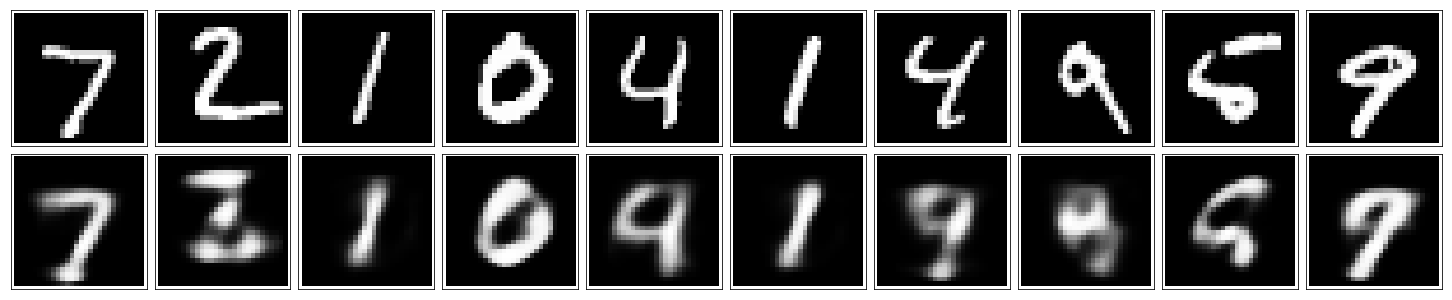

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
print(axes.shape)
print(fig)
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [8]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.